# Homework 6

For this homework, you'll be looking at the survey data gathered from the last exam. For each cell, answer the question either with code or text, as specified.

The data is here: https://drive.google.com/file/d/1-0d9sGptmBTbzf4jRGYDE8pWwxz0d-0z/view?usp=sharing

Copy this notebook, fill it out, and then submit it.


# Question 1

Write code to load in the data in a dataframe.

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


file_path = 'MidtermSurvey_Processed.csv'
df = pd.read_csv(file_path)

# Question 2

Create a column that measures, in minutes, how long each student took for their exam. Print the column at the end.

In [93]:
df['Time'] = pd.to_datetime(df['Time'])
reference_time = pd.to_datetime('3:30:00 PM')
df['Exam_Duration'] = (df['Time'] - reference_time).dt.total_seconds() // 60


# Question 3

Create a graph, comparing the distributions of the grades of students who thought the exam was fair, kind of fair, or not fair. (Note: If you create a graph that does not do a good job visuaizing this, you will loose points. For example, if you make a pie chart somehow, the graders will have no mercy).

Yes      177
Kinda     41
No        28
Name: Fair, dtype: int64


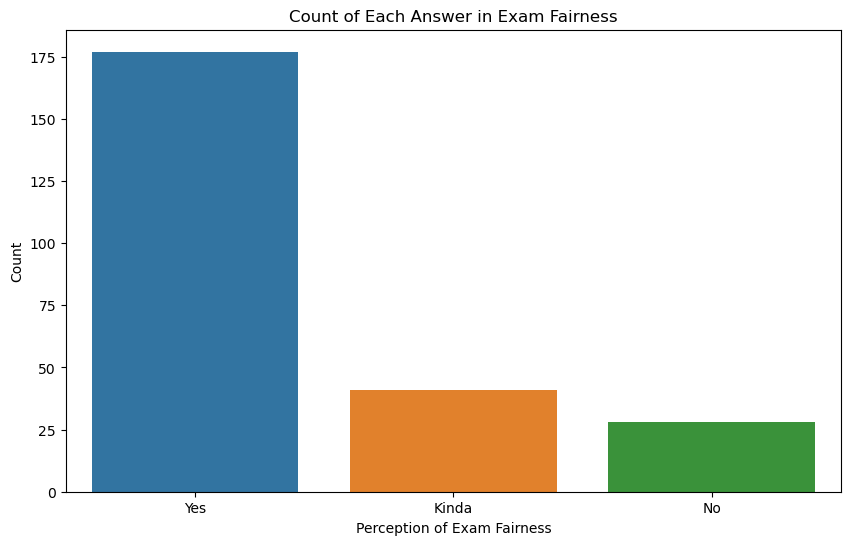

In [94]:
value_counts = df['Fair'].value_counts(dropna=True)
print(value_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Count of Each Answer in Exam Fairness')
plt.xlabel('Perception of Exam Fairness')
plt.ylabel('Count')
plt.show()

# Question 4

Do a hypothesis test to see if the distributions of student's grades for those of whom thought the exam was fair, kinda fair, or unfair have a stastically significant difference in mean. Print your p-value.

#### Create Null and Alternate Hypothesis 

$N_0 = $ Exam fair percetion has no correlaton to the grade

$N_A = $ There's a significant association between grade and exam fair percetion

In [95]:
fair_column = 'Fair'
grade_column = 'Grade'

cross_table = pd.crosstab(df[fair_column], df[grade_column])
chi2, p_value, _, _ = chi2_contingency(cross_table)
# print('Cross Table:')
# print(cross_table)
print(p_value)

if p_value < 0.05:
    print('The variables are dependent (the difference is statistically significant).')
else:
    print('The variables are independent (the difference is not statistically significant).')

0.4660942508261965
The variables are independent (the difference is not statistically significant).


# Question 5

Does studying more improve your score? Find out, and summarize the results below in text format. If it does not, speculate as to why.

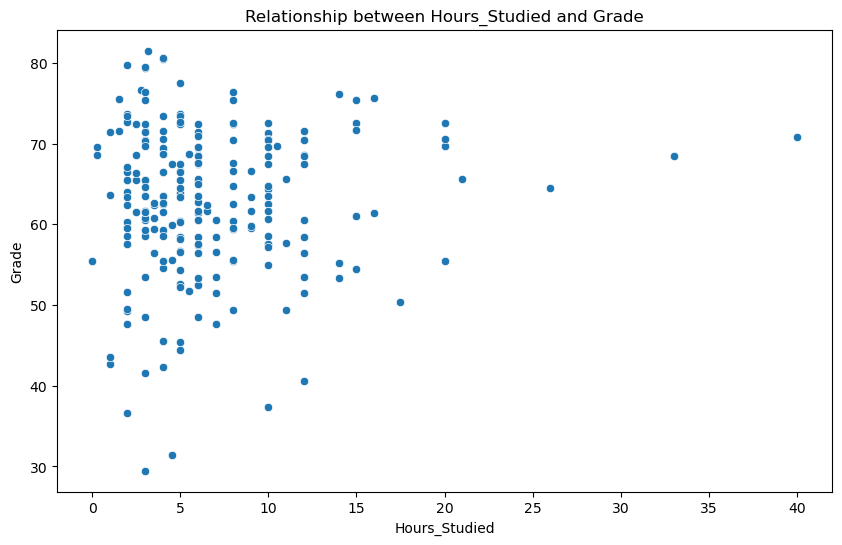

Correlation Coefficient: 0.06286069182995392


In [96]:
hours_studied_column = 'Hours_Studied'
grade_column = 'Grade'
correlation_coefficient = df[hours_studied_column].corr(df[grade_column])

    # Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hours_studied_column, y=grade_column, data=df)
plt.title(f'Relationship between {hours_studied_column} and {grade_column}')
plt.xlabel(hours_studied_column)
plt.ylabel(grade_column)
plt.show()

    # Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')


#### The correlation coefficient is close to 0 which means there is no strong correlation between study hours and grade. Maybe studnets don't know their study hour and just put a random number. Or mayne the study hour doesn't imply how well that are at the knowlwdge

# Question 6

Make another graph based on a question you think might be interesting.

### Does sleep more improve your score?

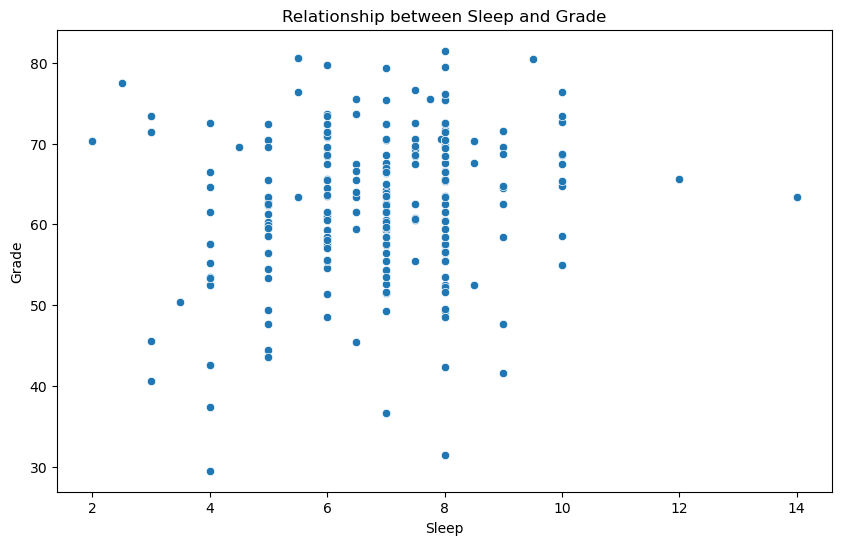

Correlation Coefficient: 0.17649048543469256


In [97]:
hours_studied_column = 'Sleep'
grade_column = 'Grade'
correlation_coefficient = df[hours_studied_column].corr(df[grade_column])

    # Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hours_studied_column, y=grade_column, data=df)
plt.title(f'Relationship between {hours_studied_column} and {grade_column}')
plt.xlabel(hours_studied_column)
plt.ylabel(grade_column)
plt.show()

    # Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient}')


# Question 7

Do a hypothesis test on something you think is interesting.

#### Since I am looking for the correlation between sleep and grade, we just need to find the correlation coefficient which is very close to 0. Therefore, we can say that sleep and grade do not have strong correlation without using hypothesis test.

In [98]:
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.17649048543469256


# Question 8

Write code that trains a regression algorithm over the data, predicting grade. You may not use the "mystery" column, but you may use all other columns. You must get an R^2 value > .09.

(Note: This is going to be involved! You'll have to pick a regression algorithm and possibly do some preprocessing. Use what you learned in homework 5 to train it. You don't need a test set, since it's regression!)

In [100]:
# Drop the Mystery
df_reg = df.drop(['Mystery', 'Time'], axis=1)

# Separate features and target variable
X = df_reg.drop(['Grade'], axis=1)
y = df_reg['Grade']

# Preprocessing
if y.isnull().any():
    y_imputer = SimpleImputer(strategy='mean')
    y = y_imputer.fit_transform(y.values.reshape(-1, 1))
    y = pd.Series(y.flatten(), name='Grade')

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

pipeline.fit(X, y)
# Make predictions on the training data
y_pred = pipeline.predict(X)

# Evaluate the model using R^2
r2_value = r2_score(y, y_pred)
print(f'R^2 Value: {r2_value}')

R^2 Value: 0.1328846570156048


# Question 9

Is your model any good? What does its performance tell you about the input variables' relationship to your grade?

#### My model preprocessed many invalid cells and converted categorical input to numerical. The r^2 is small it told me that my model doens't explain the relationship between variances and target variance (grade) well.

# Question 10

Execute the same code with the addition of the mystery column. You must get an R^2 higher than .7. Print your R^2 value.

In [101]:
# Drop the Mystery
df_reg = df.drop(['Time'], axis=1)

# Separate features and target variable
X = df_reg.drop(['Grade'], axis=1)
y = df_reg['Grade']

# Preprocessing
if y.isnull().any():
    y_imputer = SimpleImputer(strategy='mean')
    y = y_imputer.fit_transform(y.values.reshape(-1, 1))
    y = pd.Series(y.flatten(), name='Grade')

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

pipeline.fit(X, y)
# Make predictions on the training data
y_pred = pipeline.predict(X)

# Evaluate the model using R^2
r2_value = r2_score(y, y_pred)
print(f'R^2 Value: {r2_value}')

R^2 Value: 0.8492111001961422


What is the mystery column, and why did it boost your model's accuracy so much?

#### I think it is a mystery bias input that has strong relationship to the grade. Since it boosted the accuracy so much, I think it is an artificial synthetic or engineered feature that was added for the purposes of the specific dataset or analysis